In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize, minmax_scale

In [2]:
# read data from csv isnan = False
water_usage = pd.read_csv("../data/lac_water_usage.csv", thousands=',')
# remove column Name from water_usage
water_usage = water_usage.drop(columns=['Name'])

Number of records: 354060
Bill Date Range: 2018/07/09 to 2022/06/30
Number of unique accounts: 7496
Distribution of account types:
Type
RESIDENTL     6982
COMMERCIAL     289
COUNTY          95
MULTIFAMLY      76
HYDRANT         29
SCHOOL          29
Name: count, dtype: int64


<Axes: xlabel='Type'>

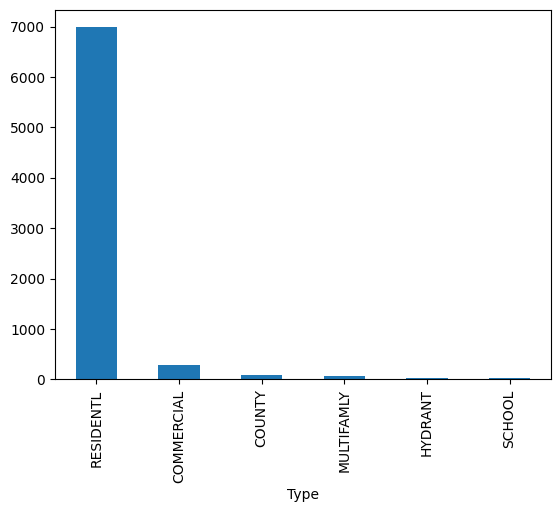

In [6]:
print(f"Number of records: {len(water_usage.index)}")
print(f"Bill Date Range: {water_usage['Bill Date'].min()} to {water_usage['Bill Date'].max()}")
print(f"Number of unique accounts: {water_usage['Account'].nunique()}")
print(f"Distribution of account types:\n{water_usage.drop_duplicates(['Type','Account'])['Type'].value_counts()}")

# print distribution of account types
water_usage.drop_duplicates(['Type','Account'])['Type'].value_counts().plot(kind='bar')

For COUNTY, 65% use < 9kgal/mo. 74% use < 15kgal/mo.
For HYDRANT, 38% use < 9kgal/mo. 62% use < 15kgal/mo.
For COMMERCIAL, 69% use < 9kgal/mo. 80% use < 15kgal/mo.
For MULTIFAMLY, 38% use < 9kgal/mo. 51% use < 15kgal/mo.
For SCHOOL, 59% use < 9kgal/mo. 59% use < 15kgal/mo.
For RESIDENTL, 77% use < 9kgal/mo. 93% use < 15kgal/mo.


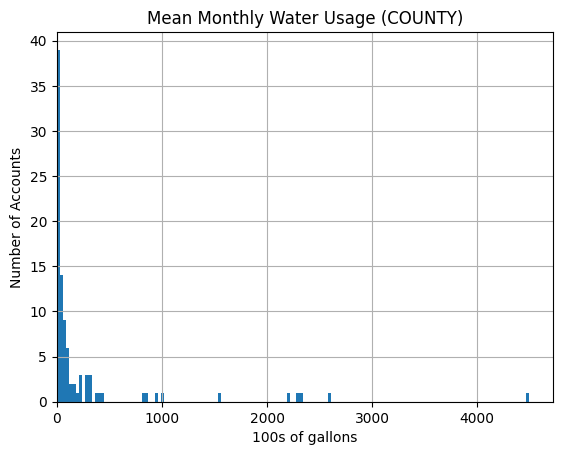

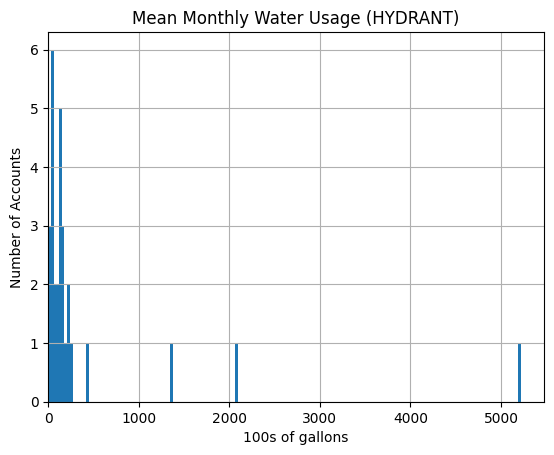

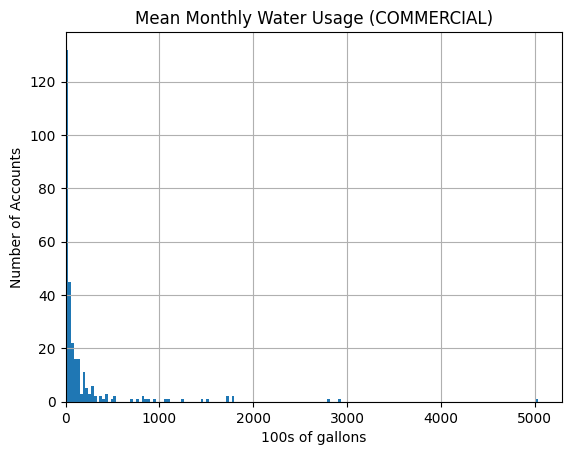

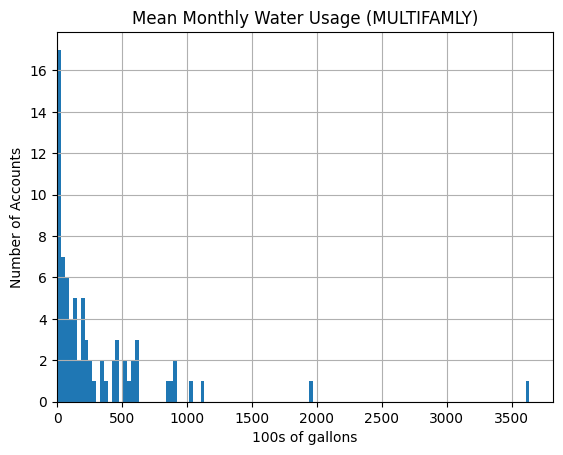

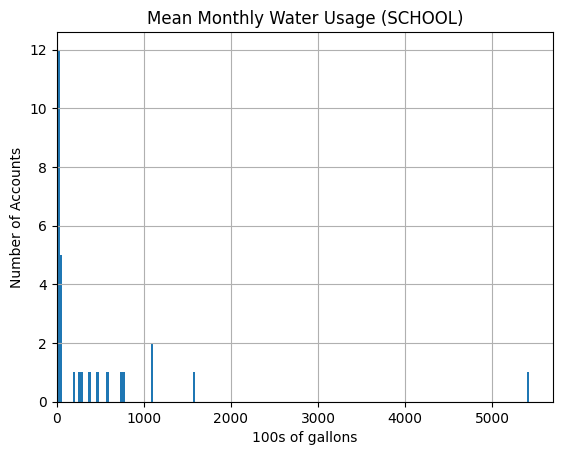

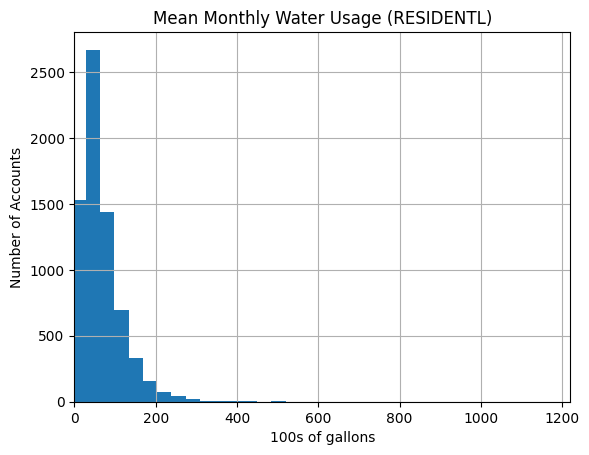

In [8]:
account_types = water_usage['Type'].unique()
for account_type in account_types:
    # Get records for this account type
    accounts = water_usage[water_usage['Type'] == account_type]
    # Mean water usage for each account in this account type
    mean_water_usage = accounts.groupby(['Account'])['Actual Usage'].mean()
    nbins = int(np.ceil(mean_water_usage.max()/30))
    #print(mean_water_usage.max(),nbins)
    # create a histogram of mean water usage by account type
    fig = plt.figure()
    hist = mean_water_usage.hist(bins=nbins)
    hist.set_title(f"Mean Monthly Water Usage ({account_type})")
    hist.set_xlabel("100s of gallons")
    hist.set_ylabel("Number of Accounts")
    hist.set_xlim(xmin=0)
    # Percentage of accounts who use < 9kgal
    under_9k = len(mean_water_usage.loc[mean_water_usage < 90])/len(mean_water_usage)
    # Percentage of accounts who use < 15kgal
    under_15k = len(mean_water_usage.loc[mean_water_usage < 150])/len(mean_water_usage)
    print(f"For {account_type}, {under_9k:.0%} use < 9kgal/mo. {under_15k:.0%} use < 15kgal/mo.")
